Nama: Alfani Nur Azizah
NPM: 24083010048
Kelas: Matematika Diskrit (A)


Tittle: Longitudinal association between social media use and psychological distress among adolescents. Preventive Medicine, 141, 106270.
DOI: 10.1016/j.ypmed.2020.106270
Link paper: (https://pmc.ncbi.nlm.nih.gov/articles/PMC8389076/pdf/nihms-1732128.pdf)
Asal negara author: kolaborasi peneliti dari Islandia dan Amerika Serikat.

### **Tabel Pivot Konsonan dan Vokal dalam Kata**

### **Abstract**

This study aimed to examine in a longitudinal cohort design whether social media use among adolescents is related to symptoms of social anxiety, depressed mood, and physical symptoms of anxiety over time. As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed. Of the 3914 eligible adolescents, 2378 gave informed consent. Complete responses for this study were collected from 2211 students at the first wave, with 2052 responding roughly 12 months later, and 2097 responding in year 3. Linear mixed-effects models were used to analyze time spent on social media in relation to psychological distress over time. More time spent on social media was weakly but significantly associated with increased symptoms of depressed mood, social anxiety and symptoms of physical anxiety over time. However, the effect size of these relationships suggest they may not be of clinical relevance. The relationship between time
spent on social media and symptoms of depressed mood and physical symptoms of anxiety grew stronger over time, although it is not known if this relationship is causal. The relationship between time spent on social media and all outcomes of psychological distress were stronger for girls than boys and increased social media use had a positive relationship with symptoms of depressed mood over time. The relationships found in this study were relatively small and future studies need to focus on the clinical and public health significance of these effects.

In [2]:
import pandas as pd
import re


text = """This study aimed to examine in a longitudinal cohort design whether social media use among adolescents is related to symptoms of social anxiety, depressed mood, and physical symptoms of anxiety over time. As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed. Of the 3914 eligible adolescents, 2378 gave informed consent. Complete responses for this study were collected from 2211 students at the first wave, with 2052 responding roughly 12 months later, and 2097 responding in year 3. Linear mixed-effects models were used to analyze time spent on social media in relation to psychological distress over time. More time spent on social media was weakly but significantly associated with increased symptoms of depressed mood, social anxiety and symptoms of physical anxiety over time. However, the effect size of these relationships suggest they may not be of clinical relevance. The relationship between time
spent on social media and symptoms of depressed mood and physical symptoms of anxiety grew stronger over time, although it is not known if this relationship is causal. The relationship between time spent on social media and all outcomes of psychological distress were stronger for girls than boys and increased social media use had a positive relationship with symptoms of depressed mood over time. The relationships found in this study were relatively small and future studies need to focus on the clinical and public health significance of these effects."""

clean_text = re.sub(r'[^a-z\s]', '', text.lower()) # Digunakan untuk mengubah huruf menjadi kecil semua dan menghapus yang non-huruf.

words = clean_text.split() # Digunakan untuk mengubah menjadi daftar kata

print(words[:30])


['this', 'study', 'aimed', 'to', 'examine', 'in', 'a', 'longitudinal', 'cohort', 'design', 'whether', 'social', 'media', 'use', 'among', 'adolescents', 'is', 'related', 'to', 'symptoms', 'of', 'social', 'anxiety', 'depressed', 'mood', 'and', 'physical', 'symptoms', 'of', 'anxiety']


Kode di atas merupakan awalan sebelum masuk ke dalam perhitungan jumlah vokal dan konsonan tiap kata. Sebelum melakukan perhitungan, dilakukan pembersihan teks dengan cara mengubah semua huruf menjadi lower dan menghapus non-huruf. Selanjutnya,  kalimat abstract diubah menjadi daftar kata. Output di atas menunjukkan daftar kata yang terdapat pada abstract.


In [3]:
def hitung_vokal_konsonan(word):
    vokal = 'aeiou'
    v_hitung = sum(1 for c in word if c in vokal)
    c_hitung = sum(1 for c in word if c.isalpha() and c not in vokal)
    return v_hitung, c_hitung

# digunakan untuk membuat dataframe
data = []
for w in words:
    v, c = hitung_vokal_konsonan(w)
    data.append({'word': w, 'vokal': v, 'konsonan': c})

df = pd.DataFrame(data)
print(df)


             word  vokal  konsonan
0            this      1         3
1           study      1         4
2           aimed      3         2
3              to      1         1
4         examine      4         3
..            ...    ...       ...
237        health      2         4
238  significance      5         7
239            of      1         1
240         these      2         3
241       effects      2         5

[242 rows x 3 columns]


Kode di atas berfungsi untuk menghitung jumlah huruf vokal dan konsonan dalam setiap kata. Output dari kode di atas akan menampilkan jumlah seperti kata "this" memiliki 1 huruf vokal dan 3 huruf konsonan. Analisis terhadap jumlah huruf vokal dan konsonan di setiap kata menunjukkan bahwa teks memiliki lebih banyak konsonan dibandingkan vokal.

In [4]:
# pivot tabel: jumlah kata berdasarkan kombinasi vokal & konsonan
pivot_abs = pd.pivot_table(df, index='konsonan', columns='vokal', values='word', aggfunc='count', fill_value=0)
print(pivot_abs)


vokal      1   2   3  4  5
konsonan                  
0          2   0   0  0  0
1         40   2   0  0  0
2         28  30   7  0  0
3         15   8  11  1  0
4         12   7  12  4  0
5          1   8   6  3  2
6          0   8   6  3  0
7          7   0   2  5  6
8          0   0   0  1  2
9          0   0   0  3  0


Hasil tabel pivot menunjukkan bagaimana jumlah kata dikelompokkan berdasarkan kombinasi huruf vokal dan konsonan. Sumbu x merupakan jumlah huruf vokal dan sumbu y merupakan huruf konsonan. Dari tabel tersebut terlihat bahwa kebanyakan kata dalam abstract
memiliki 1 hingga 3 huruf vokal dan 2 hingga 5 huruf konsonan.

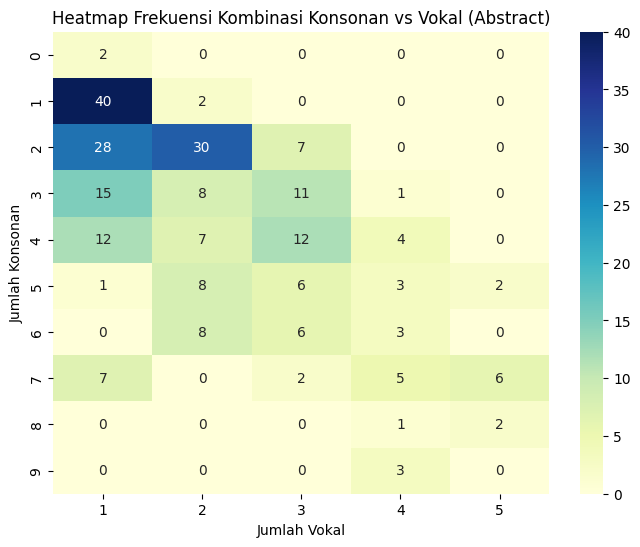

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(pivot_abs, annot=True, cmap="YlGnBu")
plt.title("Heatmap Frekuensi Kombinasi Konsonan vs Vokal (Abstract)")
plt.xlabel("Jumlah Vokal")
plt.ylabel("Jumlah Konsonan")
plt.show()


Kode di atas digunakan untuk menampilkan heatmap dari kombinasi konsonan vs vokal abstract. Output heatmap di atas menunjukkan seberapa sering kombinasi jumlah konsonan dan vokal muncul dalam data “Abstract”. Dari heatmap ini, terlihat bahwa pola frekuensi tertinggi muncul pada kombinasi yang memiliki satu konsonan dan satu vokal yaitu 40 cacah.

### **Introduction**

The simultaneous increase in social media use and worsening self-reported mental health among adolescents has motivated researchers to investigate the relationship between social media use and adolescent mental health (Heffer et al. 2019; Jensen et al. 2019; Keles et al. 2019; McCrae et al. 2017; Orben and Przybylski 2019; Riehm et al. 2019; Seabrook et al. 2016; Twenge et al. 2018). As with in-person social interactions, social media experiences can be positive, negative, neutral, or mixed. Positive aspects include connecting with friends, increased social support, and greater levels of self-expression (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019). However, possible negative aspects of social media may include upward social comparisons, cyberbullying, fewer in-person interactions (Anderson and Jiang 2018; Thorisdottir et al. 2019), less family time, and more conflicts with parents (Williams and Merten 2011).

Social media plays a role in adolescent social life and explaining how social media use can possibly influence something as complex as mental health requires a holistic theoretical framework. The transformation framework (Nesi et al. 2018a, 2018b) proposes that the unique context of social media fundamentally transforms adolescents' peer experiences across multiple domains. For example, through what is referred to as asynchronicity or the
time that passes between responses in a dialogue online, adolescents can carefully select their words and engage in many conversations at the same time, as well as decide how to present themselves. Furthermore, this ongoing dialogue may contribute to feelings of pressure to be constantly online (Calancie et al. 2017). Peer experiences are prospectively associated with mental health symptoms (Landstedt and Almquist 2019; Modin et al. 2011); thus, understanding whether social media plays a role in adolescent mental health is important.

Some studies have concluded that social media use contributes to lower psychological wellbeing and increases symptoms of depression, anxiety, and psychological distress among children and adolescents (Keles et al. 2019; McCrae et al. 2017), although the associations are weak. Others maintain that there is little or no relationship between youth social media use and symptoms of depression (Heffer et al. 2019) and psychological distress (Jensen
et al. 2019). Several systematic reviews and meta-analysis on the topic have observed contradictory evidence of mixed, null, and positive associations. However, the nature of the relationship between social media use and psychological distress is not clear. This could be due to the high reliance on cross-sectional studies and lack of mediating and moderating variables (Huang 2017; Keles et al. 2019; McCrae et al. 2017; Seabrook et al. 2016).
Another potential explanation for the disparate findings is that the concept itself is broad, often vague, and measured differently. Some studies use well-being scales (Booker et al. 2018; Orben et al. 2019), while others use general distress scales (Jensen et al. 2019) or examine symptoms of  internalizing problems (Riehm et al. 2019), such as anxiety and depression (Boers et al. 2019; Coyne et al. 2020; Heffer et al. 2019; Vannucci and McCauley Ohannessian 2019).

The few longitudinal studies on the topic have reported mixed findings. Some find that social media use predicts higher depressive symptoms (Boers et al. 2019; Vannucci and McCauley Ohannessian 2019), panic disorder symptoms (Vannucci and McCauley Ohannessian 2019), greater internalizing problems (Boers et al. 2019; Riehm et al. 2019) and worse well-being (Booker et al. 2018). However, others have found that frequency of social media use does not predict later mental health outcomes (Coyne et al. 2020; Jensen et al. 2019).

The role of gender in social media and mental health relationship has also been inconclusive (McCrae et al. 2017). Where there are gender differences, the relationship between social media and worse mental health has either been stronger for girls than boys (Frison and Eggermont 2016; Thorisdottir et al. 2019) or only exist for girls (Devine and Lloyd 2012). A study on the relationship between social media and life satisfaction measured within six domains (i.e., friends, family, appearance, life, school work, and school) found that gender was important; within-person models were significant for two out of six domains for boys and five out of six domains for girls (Orben and Przybylski 2019). However, two longitudinal studies found no gender differences in social media use and internalizing symptoms (Riehm et al. 2019; Vannucci and McCauley Ohannessian 2019). Given these inconsistent findings, some have called for analyses to be stratified by gender or tested for gender interactions (Booker et al. 2018).

This study sought to examine, over a three-year period, the relationships between time spent on social media and symptoms of depressed mood, social anxiety, and physical symptoms of anxiety among Icelandic adolescents. While other studies have typically focused on more general concepts, such as well-being (Booker et al. 2018; Orben et al. 2019) and overall distress (Jensen et al. 2019; Riehm et al. 2019), we specifically examined symptoms of
depressed mood, differentiating physical and social symptoms of anxiety (Coyne et al. 2020; Vannucci and McCauley Ohannessian 2019). Our study addresses several shortcomings of previous work. First, because social media is rapidly evolving in the way it alters how adolescents interact with their peers, the recency of our data affords an advantage over older data by providing a current analysis of the relationship between use and mental health over time. Second, given the high prevalence of anxiety among girls in Western economies (Boret al. 2014), we examined whether gender plays a role in the relationship between social media use and mental health over time. Third, there is a lack of empirical evidence on the effects of social media use on adolescents since the majority of studies have focused on young children or adults (Odgers and Jensen 2020). Finally, because of the compelling evidence showing the deleterious impact of divorce and family disruptions on children and adolescents (Amato 2000; Behere et al. 2017), we controlled for parental support and family structure (Hall-Lande et al. 2007; Stadler et al. 2010). The reason being that adolescent social media use has been associated with less family time and more conflicts with parent (Williams and Merten 2011), as well as children from single-parent households having more screen time daily (Wartella et al. 2013).

We hypothesized that: 1) there is a positive relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety; 2) the relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety increases over time; and 3) the observed relationships between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety will be stronger for girls than
boys.

In [8]:
import pandas as pd
import re


text = """The simultaneous increase in social media use and worsening self-reported mental health among adolescents has motivated researchers to investigate the relationship between social media use and adolescent mental health (Heffer et al. 2019; Jensen et al. 2019; Keles et al. 2019; McCrae et al. 2017; Orben and Przybylski 2019; Riehm et al. 2019; Seabrook et al. 2016; Twenge et al. 2018). As with in-person social interactions, social media experiences can be positive, negative, neutral, or mixed. Positive aspects include connecting with friends, increased social support, and greater levels of self-expression (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019). However, possible negative aspects of social media may include upward social comparisons, cyberbullying, fewer in-person interactions (Anderson and Jiang 2018; Thorisdottir et al. 2019), less family time, and more conflicts with parents (Williams and Merten 2011).

Social media plays a role in adolescent social life and explaining how social media use can possibly influence something as complex as mental health requires a holistic theoretical framework. The transformation framework (Nesi et al. 2018a, 2018b) proposes that the unique context of social media fundamentally transforms adolescents' peer experiences across multiple domains. For example, through what is referred to as asynchronicity or the
time that passes between responses in a dialogue online, adolescents can carefully select their words and engage in many conversations at the same time, as well as decide how to present themselves. Furthermore, this ongoing dialogue may contribute to feelings of pressure to be constantly online (Calancie et al. 2017). Peer experiences are prospectively associated with mental health symptoms (Landstedt and Almquist 2019; Modin et al. 2011); thus, understanding whether social media plays a role in adolescent mental health is important.

Some studies have concluded that social media use contributes to lower psychological wellbeing and increases symptoms of depression, anxiety, and psychological distress among children and adolescents (Keles et al. 2019; McCrae et al. 2017), although the associations are weak. Others maintain that there is little or no relationship between youth social media use and symptoms of depression (Heffer et al. 2019) and psychological distress (Jensen
et al. 2019). Several systematic reviews and meta-analysis on the topic have observed contradictory evidence of mixed, null, and positive associations. However, the nature of the relationship between social media use and psychological distress is not clear. This could be due to the high reliance on cross-sectional studies and lack of mediating and moderating variables (Huang 2017; Keles et al. 2019; McCrae et al. 2017; Seabrook et al. 2016).
Another potential explanation for the disparate findings is that the concept itself is broad, often vague, and measured differently. Some studies use well-being scales (Booker et al. 2018; Orben et al. 2019), while others use general distress scales (Jensen et al. 2019) or examine symptoms of  internalizing problems (Riehm et al. 2019), such as anxiety and depression (Boers et al. 2019; Coyne et al. 2020; Heffer et al. 2019; Vannucci and McCauley Ohannessian 2019).

The few longitudinal studies on the topic have reported mixed findings. Some find that social media use predicts higher depressive symptoms (Boers et al. 2019; Vannucci and McCauley Ohannessian 2019), panic disorder symptoms (Vannucci and McCauley Ohannessian 2019), greater internalizing problems (Boers et al. 2019; Riehm et al. 2019) and worse well-being (Booker et al. 2018). However, others have found that frequency of social media use does not predict later mental health outcomes (Coyne et al. 2020; Jensen et al. 2019).

The role of gender in social media and mental health relationship has also been inconclusive (McCrae et al. 2017). Where there are gender differences, the relationship between social media and worse mental health has either been stronger for girls than boys (Frison and Eggermont 2016; Thorisdottir et al. 2019) or only exist for girls (Devine and Lloyd 2012). A study on the relationship between social media and life satisfaction measured within six domains (i.e., friends, family, appearance, life, school work, and school) found that gender was important; within-person models were significant for two out of six domains for boys and five out of six domains for girls (Orben and Przybylski 2019). However, two longitudinal studies found no gender differences in social media use and internalizing symptoms (Riehm et al. 2019; Vannucci and McCauley Ohannessian 2019). Given these inconsistent findings, some have called for analyses to be stratified by gender or tested for gender interactions (Booker et al. 2018).

This study sought to examine, over a three-year period, the relationships between time spent on social media and symptoms of depressed mood, social anxiety, and physical symptoms of anxiety among Icelandic adolescents. While other studies have typically focused on more general concepts, such as well-being (Booker et al. 2018; Orben et al. 2019) and overall distress (Jensen et al. 2019; Riehm et al. 2019), we specifically examined symptoms of
depressed mood, differentiating physical and social symptoms of anxiety (Coyne et al. 2020; Vannucci and McCauley Ohannessian 2019). Our study addresses several shortcomings of previous work. First, because social media is rapidly evolving in the way it alters how adolescents interact with their peers, the recency of our data affords an advantage over older data by providing a current analysis of the relationship between use and mental health over time. Second, given the high prevalence of anxiety among girls in Western economies (Boret al. 2014), we examined whether gender plays a role in the relationship between social media use and mental health over time. Third, there is a lack of empirical evidence on the effects of social media use on adolescents since the majority of studies have focused on young children or adults (Odgers and Jensen 2020). Finally, because of the compelling evidence showing the deleterious impact of divorce and family disruptions on children and adolescents (Amato 2000; Behere et al. 2017), we controlled for parental support and family structure (Hall-Lande et al. 2007; Stadler et al. 2010). The reason being that adolescent social media use has been associated with less family time and more conflicts with parent (Williams and Merten 2011), as well as children from single-parent households having more screen time daily (Wartella et al. 2013).

We hypothesized that: 1) there is a positive relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety; 2) the relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety increases over time; and 3) the observed relationships between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety will be stronger for girls than
boys.."""

clean_text = re.sub(r'[^a-z\s]', '', text.lower()) # Digunakan untuk mengubah huruf menjadi kecil semua dan menghapus yang non-huruf.

words = clean_text.split() # Digunakan untuk mengubah menjadi daftar kata

print(words[:30])


['the', 'simultaneous', 'increase', 'in', 'social', 'media', 'use', 'and', 'worsening', 'selfreported', 'mental', 'health', 'among', 'adolescents', 'has', 'motivated', 'researchers', 'to', 'investigate', 'the', 'relationship', 'between', 'social', 'media', 'use', 'and', 'adolescent', 'mental', 'health', 'heffer']


Kode di atas digunakan untuk mengubah huruf menjadi lower dan untuk mengubah menjadi daftar kata. Output dari kode di atas yaitu 'the', 'in' dll.

In [9]:
def hitung_vokal_konsonan(word):
    vokal = 'aeiou'
    v_hitung = sum(1 for c in word if c in vokal)
    c_hitung = sum(1 for c in word if c.isalpha() and c not in vokal)
    return v_hitung, c_hitung

# digunakan untuk membuat dataframe
data = []
for w in words:
    v, c = hitung_vokal_konsonan(w)
    data.append({'word': w, 'vokal': v, 'konsonan': c})

df_intro = pd.DataFrame(data)
print(df_intro)


              word  vokal  konsonan
0              the      1         2
1     simultaneous      6         6
2         increase      4         4
3               in      1         1
4           social      3         3
...            ...    ...       ...
1027      stronger      2         6
1028           for      1         2
1029         girls      1         4
1030          than      1         3
1031          boys      1         3

[1032 rows x 3 columns]


Kode di atas berfungsi untuk menghitung jumlah huruf vokal dan konsonan dalam setiap kata pada teks introduction, lalu hasilnya akan menjadi sebuah tabel analisis.
Oupt dari DataFrame tersebut menunjukkan setiap kata beserta jumlah vokal dan konsonannya, seperti 'the' yang memiliki 1 huruf vokal dan 2 konsonan. Selain itu, dapat diketahui jumlah kata dalam teks introduction yaitu 1032 cacah.

In [27]:
# pivot tabel: jumlah kata berdasarkan kombinasi vokal & konsonan
pivot_intro = pd.pivot_table(df_intro, index='konsonan', columns='vokal', values='word', aggfunc='count', fill_value=0)
print(pivot_intro)


vokal     0    1   2   3   4   5  6
konsonan                           
0         0   11   1   0   0   0  0
1         1  198  26   0   0   0  0
2         2  121  55  27   1   0  0
3         0   45  66  48   4   2  0
4         0   16  77  56  23   1  0
5         0    0  24  36  13   3  1
6         0    0  24  24  14  11  3
7         0   20   4   5  16  18  0
8         0    0   2   1   9   6  0
9         0    2   0   1   8   3  1
10        0    0   0   1   1   0  0


Dari pivot tabel di atas, dapat diketahui bahwa kombinasi paling banyak muncul pada kombinasi 1 vokal dan 1 konsonan dengan 198 cacah. Artinya, dalam teks introduction lebih banyak memakai teks pendek.

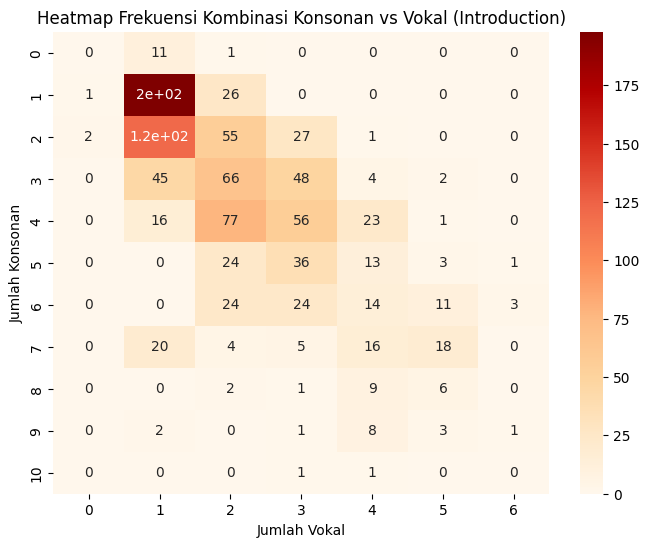

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(pivot_intro, annot=True, cmap="OrRd")
plt.title("Heatmap Frekuensi Kombinasi Konsonan vs Vokal (Introduction)")
plt.xlabel("Jumlah Vokal")
plt.ylabel("Jumlah Konsonan")
plt.show()


Heatmap pada output menunjukkan bagaimana frekuensi munculnya kombinasi huruf konsonan dan vokal terdistribusi di bagian teks Introduction. Warna pada heatmap menunjukkan seberapa sering kombinasi tersebut muncul, di mana warna merah tua berarti kombinasi tersebut muncul paling banyak, sedangkan warna terang berarti muncul lebih sedikit.

Dari heatmap terlihat bahwa area dengan 1 hingga 3 konsonan dan 1 hingga 2 vokal memiliki frekuensi tertinggi (sekitar 120 hingga 200 kata), menunjukkan bahwa kebanyakan kata dalam teks ini pendek dan memiliki struktur ucapan yang sederhana.

### **Conclusion**

In conclusion, although adolescent use of social media appears to confer some benefits (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019), it is also a relatively new and prevalent factor in the lives of adolescents that our data show is positively related to increased levels of psychological distress, although the effects were weak to small. However, the effect of social media on psychological distress is most likely multifactorial
and a better understanding of the mechanisms involved is required before we can warrant major concerns about the longitudinal impact of social media on adolescent mental health.


In [16]:
import pandas as pd
import re


text = """In conclusion, although adolescent use of social media appears to confer some benefits (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019), it is also a relatively new and prevalent factor in the lives of adolescents that our data show is positively related to increased levels of psychological distress, although the effects were weak to small. However, the effect of social media on psychological distress is most likely multifactorial
and a better understanding of the mechanisms involved is required before we can warrant major concerns about the longitudinal impact of social media on adolescent mental health."""

clean_text = re.sub(r'[^a-z\s]', '', text.lower()) # Digunakan untuk mengubah huruf menjadi kecil semua dan menghapus yang non-huruf.

words = clean_text.split() # Digunakan untuk mengubah menjadi daftar kata

print(words[:30])


['in', 'conclusion', 'although', 'adolescent', 'use', 'of', 'social', 'media', 'appears', 'to', 'confer', 'some', 'benefits', 'anderson', 'and', 'jiang', 'seabrook', 'et', 'al', 'thorisdottir', 'et', 'al', 'it', 'is', 'also', 'a', 'relatively', 'new', 'and', 'prevalent']


Kode di atas merupakan awalan sebelum masuk ke dalam perhitungan jumlah vokal dan konsonan tiap kata. Sebelum melakukan perhitungan, dilakukan pembersihan teks dengan cara mengubah semua huruf menjadi lower dan menghapus non-huruf. Selanjutnya,  kalimat conclusion tersebut diubah menjadi daftar kata. Output di atas menunjukkan daftar kata yang terdapat pada conclusion, seperti "in" dan "use".


In [19]:
def hitung_vokal_konsonan(word):
    vokal = 'aeiou'
    v_hitung = sum(1 for c in word if c in vokal)
    c_hitung = sum(1 for c in word if c.isalpha() and c not in vokal)
    return v_hitung, c_hitung

# digunakan untuk membuat dataframe
data = []
for w in words:
    v, c = hitung_vokal_konsonan(w)
    data.append({'word': w, 'vokal': v, 'konsonan': c})

df_con = pd.DataFrame(data)
print(df_con)


          word  vokal  konsonan
0           in      1         1
1   conclusion      4         6
2     although      3         5
3   adolescent      4         6
4          use      2         1
..         ...    ...       ...
91       media      3         2
92          on      1         1
93  adolescent      4         6
94      mental      2         4
95      health      2         4

[96 rows x 3 columns]


Output tersebut menunjukkan setiap kata beserta jumlah vokal dan konsonannya, seperti 'media' yang memiliki 3 huruf vokal dan 2 konsonan. Selain itu, dari tabel di atas, diketahui bahwa jumlah kata dalam teks conclusion adalah 95 cacah.

In [29]:
# pivot tabel: jumlah kata berdasarkan kombinasi vokal & konsonan
pivot_con = pd.pivot_table(df_con, index='konsonan', columns='vokal', values='word', aggfunc='count', fill_value=0)
print(pivot_con)


vokal      1  2  3  4  5  6
konsonan                   
0          2  0  0  0  0  0
1         23  2  0  0  0  0
2         10  5  4  0  0  0
3          3  3  4  0  0  0
4          1  9  3  2  0  0
5          0  2  5  1  0  0
6          0  3  1  5  0  0
7          0  0  1  1  1  0
8          0  0  0  1  0  1
9          0  0  0  3  0  0


Seperti penjelasan sebelumnya, pivot tabel di atas menunjukkan jumlah kombinasi penggunan vokal dan konsonan dalam teks conclusion. Diketahui bahwa jumlah kombinasi paling banyak yaitu 1 vokal dan 1 konsonan dengan 23 kemunculan.

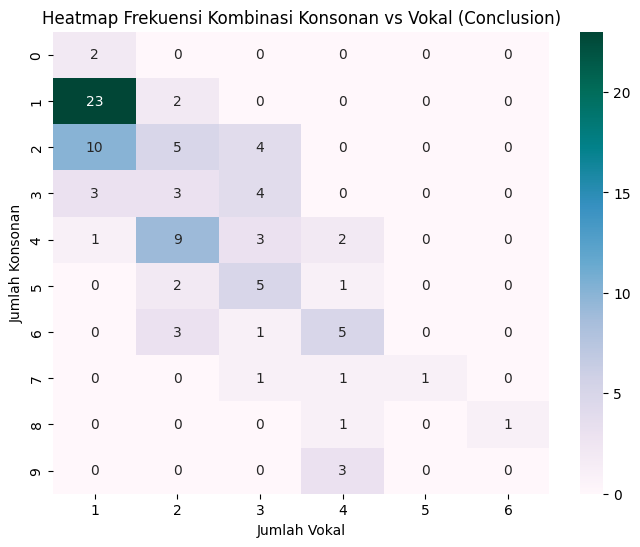

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(pivot_con, annot=True, cmap="PuBuGn")
plt.title("Heatmap Frekuensi Kombinasi Konsonan vs Vokal (Conclusion)")
plt.xlabel("Jumlah Vokal")
plt.ylabel("Jumlah Konsonan")
plt.show()

Heatmap di atas menampilkan frekuensi kombinasi antara jumlah huruf konsonan dan huruf vokal pada bagian teks Conclusion. Setiap sel pada heatmap menunjukkan seberapa sering kombinasi tertentu muncul dengan intensitas warna mewakili jumlah kemunculannya. Semakin gelap warna (hijau tua), semakin tinggi frekuensinya. Sama dengan pivot tabel, pada heatmap ini kita bisa melihat visualisasi dari setiap kombinasi. Frekuensi paling banyak muncul yaitu 1 vokal dan 1 konsonan dengan 23 kemunculan.

Dari pivot dan heatmap yang telah dibuat, kombinasi paling sering muncul dari abstract, introduction, dan conclusion adalah kata dengan 1 huruf vokal dan 1 huruf konsonan. Hal Ini menunjukkan bahwa teks banyak mengandung kata-kata pendek seperti “in”, “at”, atau “of”. Kata-kata ini umumnya merupakan function words yang berperan penting dalam menyusun struktur kalimat, meskipun tidak membawa makna leksikal yang berat.

### **Jumlah Kata dalam Kalimat**

### **Abstract**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


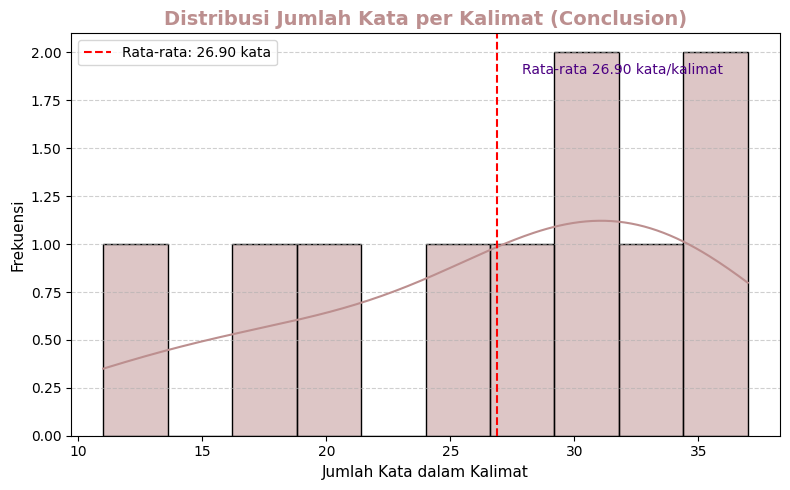

Kalimat 1: 35 kata
Kalimat 2: 31 kata
Kalimat 3: 11 kata
Kalimat 4: 30 kata
Kalimat 5: 20 kata
Kalimat 6: 28 kata
Kalimat 7: 17 kata
Kalimat 8: 34 kata
Kalimat 9: 37 kata
Kalimat 10: 26 kata


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns


text_abs = """This study aimed to examine in a longitudinal cohort design whether social media use among adolescents is related to symptoms of social anxiety, depressed mood, and physical symptoms of anxiety over time. As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed. Of the 3914 eligible adolescents, 2378 gave informed consent. Complete responses for this study were collected from 2211 students at the first wave, with 2052 responding roughly 12 months later, and 2097 responding in year 3. Linear mixed-effects models were used to analyze time spent on social media in relation to psychological distress over time. More time spent on social media was weakly but significantly associated with increased symptoms of depressed mood, social anxiety and symptoms of physical anxiety over time. However, the effect size of these relationships suggest they may not be of clinical relevance. The relationship between time
spent on social media and symptoms of depressed mood and physical symptoms of anxiety grew stronger over time, although it is not known if this relationship is causal. The relationship between time spent on social media and all outcomes of psychological distress were stronger for girls than boys and increased social media use had a positive relationship with symptoms of depressed mood over time. The relationships found in this study were relatively small and future studies need to focus on the clinical and public health significance of these effects."""
# tokenisasi kalimat
kalimat_abs = sent_tokenize(text_abs)

# hitung jumlah kata tiap kalimat
jumlah_kata_abs = [len(word_tokenize(k)) for k in kalimat_abs]

# tampilkan histogram
plt.figure(figsize=(8,5))

# visualisasi histogram
sns.histplot(jumlah_kata_abs, bins=10, kde=True, color='rosybrown', edgecolor='black')
plt.title("Distribusi Jumlah Kata per Kalimat (Conclusion)", fontsize=14, fontweight='bold', color='rosybrown')
plt.xlabel("Jumlah Kata dalam Kalimat", fontsize=11)
plt.ylabel("Frekuensi", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
rata2 = sum(jumlah_kata_abs) / len(jumlah_kata_abs)
plt.axvline(rata2, color='red', linestyle='--', linewidth=1.5, label=f'Rata-rata: {rata2:.2f} kata')
plt.legend()
plt.text(rata2 + 1, max(plt.gca().get_ylim())*0.9,
         f"Rata-rata {rata2:.2f} kata/kalimat",
         color='indigo', fontsize=10)

plt.tight_layout()
plt.show()

for i, n in enumerate(jumlah_kata_abs, 1):
    print(f"Kalimat {i}: {n} kata")

Kode di atas berfungsi untuk menganalisis struktur teks dengan menghitung jumlah kata dalam setiap kalimat dan menampilkannya dalam bentuk visualisasi histogram. Digunakan fungsi sent_tokenize untuk memisahkan kalimat menjadi daftar kata. Lalu, jumlah kata dihitung menggunakan fungsi word_tokenize.

Dari hasil histogram di atas, diketahui bahwa rata-rata jumlah kata pada setiap kalimat abstract yaitu 26,9 kata. Sebagian besar kalimat memiliki 30 dan 35 kata. Garis rata-rata yang berada di tengah distribusi menunjukkan bahwa panjang kalimat relatif seimbang—tidak terlalu pendek maupun terlalu panjang.
Hal ini menunjukkan bahwa penulis menggunakan struktur kalimat yang kompleks,tetapi tetap proporsional.

### **Introduction**

'As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed.'


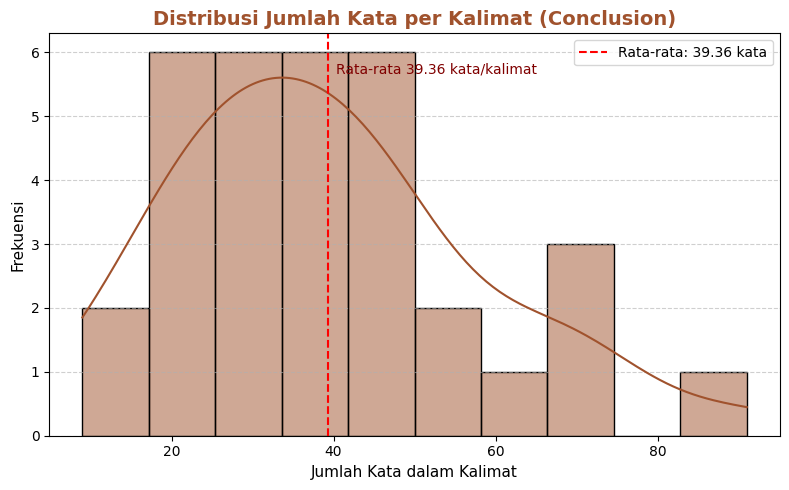

Kalimat 1: 72 kata
Kalimat 2: 20 kata
Kalimat 3: 33 kata
Kalimat 4: 47 kata
Kalimat 5: 30 kata
Kalimat 6: 29 kata
Kalimat 7: 47 kata
Kalimat 8: 22 kata
Kalimat 9: 37 kata
Kalimat 10: 46 kata
Kalimat 11: 34 kata
Kalimat 12: 21 kata
Kalimat 13: 18 kata
Kalimat 14: 38 kata
Kalimat 15: 22 kata
Kalimat 16: 70 kata
Kalimat 17: 12 kata
Kalimat 18: 58 kata
Kalimat 19: 30 kata
Kalimat 20: 22 kata
Kalimat 21: 46 kata
Kalimat 22: 65 kata
Kalimat 23: 29 kata
Kalimat 24: 27 kata
Kalimat 25: 37 kata
Kalimat 26: 68 kata
Kalimat 27: 9 kata
Kalimat 28: 47 kata
Kalimat 29: 39 kata
Kalimat 30: 37 kata
Kalimat 31: 50 kata
Kalimat 32: 46 kata
Kalimat 33: 91 kata


In [6]:
text_intro = """The simultaneous increase in social media use and worsening self reported mental health among adolescents has motivated researchers to investigate the relationship between social media use and adolescent mental health (Heffer et al 2019; Jensen et al 2019; Keles et al 2019; McCrae et al 2017; Orben and Przybylski 2019; Riehm et al 2019; Seabrook et al 2016; Twenge et al 2018). As with in-person social interactions, social media experiences can be positive, negative, neutral, or mixed. Positive aspects include connecting with friends, increased social support, and greater levels of self-expression (Anderson and Jiang 2018; Seabrook et al 2016; Thorisdottir et al 2019). However, possible negative aspects of social media may include upward social comparisons, cyberbullying, fewer in-person interactions (Anderson and Jiang 2018; Thorisdottir et al 2019), less family time, and more conflicts with parents (Williams and Merten 2011).

Social media plays a role in adolescent social life and explaining how social media use can possibly influence something as complex as mental health requires a holistic theoretical framework. The transformation framework (Nesi et al 2018a, 2018b) proposes that the unique context of social media fundamentally transforms adolescents' peer experiences across multiple domains. For example, through what is referred to as asynchronicity or the
time that passes between responses in a dialogue online, adolescents can carefully select their words and engage in many conversations at the same time, as well as decide how to present themselves. Furthermore, this ongoing dialogue may contribute to feelings of pressure to be constantly online (Calancie et al 2017). Peer experiences are prospectively associated with mental health symptoms (Landstedt and Almquist 2019; Modin et al 2011); thus, understanding whether social media plays a role in adolescent mental health is important.

Some studies have concluded that social media use contributes to lower psychological wellbeing and increases symptoms of depression, anxiety, and psychological distress among children and adolescents (Keles et al 2019; McCrae et al 2017), although the associations are weak. Others maintain that there is little or no relationship between youth social media use and symptoms of depression (Heffer et al 2019) and psychological distress (Jensen
et al 2019). Several systematic reviews and meta-analysis on the topic have observed contradictory evidence of mixed, null, and positive associations. However, the nature of the relationship between social media use and psychological distress is not clear. This could be due to the high reliance on cross-sectional studies and lack of mediating and moderating variables (Huang 2017; Keles et al 2019; McCrae et al 2017; Seabrook et al 2016).
Another potential explanation for the disparate findings is that the concept itself is broad, often vague, and measured differently. Some studies use well-being scales (Booker et al 2018; Orben et al 2019), while others use general distress scales (Jensen et al 2019) or examine symptoms of  internalizing problems (Riehm et al 2019), such as anxiety and depression (Boers et al 2019; Coyne et al 2020; Heffer et al 2019; Vannucci and McCauley Ohannessian 2019).

The few longitudinal studies on the topic have reported mixed findings. Some find that social media use predicts higher depressive symptoms (Boers et al 2019; Vannucci and McCauley Ohannessian 2019), panic disorder symptoms (Vannucci and McCauley Ohannessian 2019), greater internalizing problems (Boers et al 2019; Riehm et al 2019) and worse well-being (Booker et al 2018). However, others have found that frequency of social media use does not predict later mental health outcomes (Coyne et al 2020; Jensen et al 2019).

The role of gender in social media and mental health relationship has also been inconclusive (McCrae et al 2017). Where there are gender differences, the relationship between social media and worse mental health has either been stronger for girls than boys (Frison and Eggermont 2016; Thorisdottir et al 2019) or only exist for girls (Devine and Lloyd 2012). A study on the relationship between social media and life satisfaction measured within six domains (ie, friends, family, appearance, life, school work, and school) found that gender was important; within-person models were significant for two out of six domains for boys and five out of six domains for girls (Orben and Przybylski 2019). However, two longitudinal studies found no gender differences in social media use and internalizing symptoms (Riehm et al 2019; Vannucci and McCauley Ohannessian 2019). Given these inconsistent findings, some have called for analyses to be stratified by gender or tested for gender interactions (Booker et al 2018).

This study sought to examine, over a three-year period, the relationships between time spent on social media and symptoms of depressed mood, social anxiety, and physical symptoms of anxiety among Icelandic adolescents. While other studies have typically focused on more general concepts, such as well-being (Booker et al 2018; Orben et al 2019) and overall distress (Jensen et al 2019; Riehm et al 2019), we specifically examined symptoms of
depressed mood, differentiating physical and social symptoms of anxiety (Coyne et al 2020; Vannucci and McCauley Ohannessian 2019). Our study addresses several shortcomings of previous work. First, because social media is rapidly evolving in the way it alters how adolescents interact with their peers, the recency of our data affords an advantage over older data by providing a current analysis of the relationship between use and mental health over time. Second, given the high prevalence of anxiety among girls in Western economies (Boret al 2014), we examined whether gender plays a role in the relationship between social media use and mental health over time. Third, there is a lack of empirical evidence on the effects of social media use on adolescents since the majority of studies have focused on young children or adults (Odgers and Jensen 2020). Finally, because of the compelling evidence showing the deleterious impact of divorce and family disruptions on children and adolescents (Amato 2000; Behere et al 2017), we controlled for parental support and family structure (Hall-Lande et al 2007; Stadler et al 2010). The reason being that adolescent social media use has been associated with less family time and more conflicts with parent (Williams and Merten 2011), as well as children from single-parent households having more screen time daily (Wartella et al 2013).

We hypothesized that: 1) there is a positive relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety; 2) the relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety increases over time; and 3) the observed relationships between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety will be stronger for girls than
boys."""

# tokenisasi kalimat
kalimat_intro = sent_tokenize(text_intro)

print(repr(kalimat_abs[1]))


# hitung jumlah kata tiap kalimat
jumlah_kata_intro = [len(word_tokenize(k)) for k in kalimat_intro]

# tampilkan histogram
plt.figure(figsize=(8,5))

# bikin histogram dengan warna dan gaya yang lebih halus
sns.histplot(jumlah_kata_intro, bins=10, kde=True, color='sienna', edgecolor='black')

# kasih judul dan label yang lebih deskriptif
plt.title("Distribusi Jumlah Kata per Kalimat (Conclusion)", fontsize=14, fontweight='bold', color='sienna')
plt.xlabel("Jumlah Kata dalam Kalimat", fontsize=11)
plt.ylabel("Frekuensi", fontsize=11)

# tambahin grid biar lebih jelas
plt.grid(axis='y', linestyle='--', alpha=0.6)

# kasih tulisan rata-rata di atas grafik
rata2 = sum(jumlah_kata_intro) / len(jumlah_kata_intro)
plt.axvline(rata2, color='red', linestyle='--', linewidth=1.5, label=f'Rata-rata: {rata2:.2f} kata')
plt.legend()

# kasih anotasi tambahan
plt.text(rata2 + 1, max(plt.gca().get_ylim())*0.9,
         f"Rata-rata {rata2:.2f} kata/kalimat",
         color='maroon', fontsize=10)

plt.tight_layout()
plt.show()

# tampilkan hasilnya di konsol
for i, n in enumerate(jumlah_kata_intro, 1):
    print(f"Kalimat {i}: {n} kata")

Hasil visualisasi menunjukkan rata-rata panjang kalimat di bagian introduction sekitar 39,36 kata per kalimat yang menandakan bahwa penulisan bagian ini cenderung menggunakan kalimat kompleks dan informatif. Kalimat-kalimat yang panjang lebih dari 60 kata kemungkinan digunakan untuk menyampaikan argumen atau penjelasan teoritis yang rinci.

### **Conclusion**

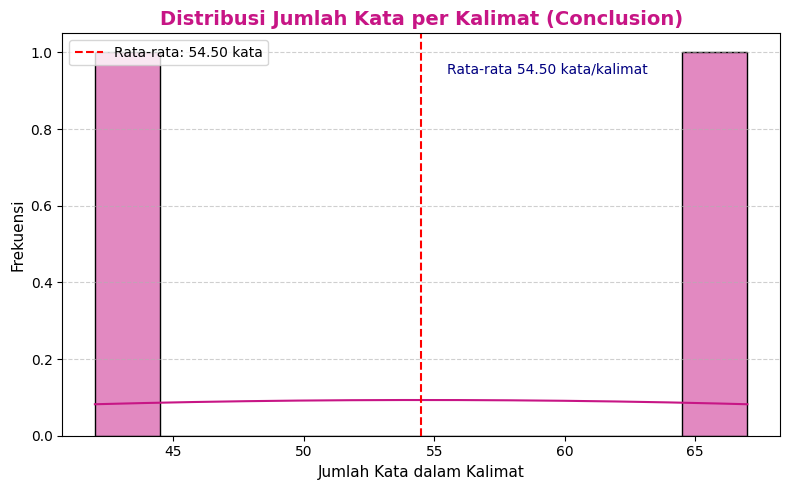

Kalimat 1: 67 kata
Kalimat 2: 42 kata


In [85]:
text_con = """In conclusion, although adolescent use of social media appears to confer some benefits (Anderson and Jiang 2018; Seabrook et al 2016; Thorisdottir et al 2019), it is also a relatively new and prevalent factor in the lives of adolescents that our data show is positively related to increased levels of psychological distress, although the effects were weak to small. However, the effect of social media on psychological distress is most likely multifactorial
and a better understanding of the mechanisms involved is required before we can warrant major concerns about the longitudinal impact of social media on adolescent mental health."""

# tokenisasi kalimat
kalimat_con = sent_tokenize(text_con)

# hitung jumlah kata tiap kalimat
jumlah_kata_con = [len(word_tokenize(k)) for k in kalimat_con]

# tampilkan histogram
plt.figure(figsize=(8,5))

# bikin histogram dengan warna dan gaya yang lebih halus
sns.histplot(jumlah_kata_con, bins=10, kde=True, color='mediumvioletred', edgecolor='black')

# kasih judul dan label yang lebih deskriptif
plt.title("Distribusi Jumlah Kata per Kalimat (Conclusion)", fontsize=14, fontweight='bold', color='mediumvioletred')
plt.xlabel("Jumlah Kata dalam Kalimat", fontsize=11)
plt.ylabel("Frekuensi", fontsize=11)

# tambahin grid biar lebih jelas
plt.grid(axis='y', linestyle='--', alpha=0.6)

# kasih tulisan rata-rata di atas grafik
rata2 = sum(jumlah_kata_con) / len(jumlah_kata_con)
plt.axvline(rata2, color='red', linestyle='--', linewidth=1.5, label=f'Rata-rata: {rata2:.2f} kata')
plt.legend()

# kasih anotasi tambahan
plt.text(rata2 + 1, max(plt.gca().get_ylim())*0.9,
         f"Rata-rata {rata2:.2f} kata/kalimat",
         color='navy', fontsize=10)

plt.tight_layout()
plt.show()

# tampilkan hasilnya di konsol
for i, n in enumerate(jumlah_kata_con, 1):
    print(f"Kalimat {i}: {n} kata")



Histogram di atas menunjukkan distribusi jumlah kata per kalimat dalam bagian "Conclusion". Terdapat 2 kalimat yang dianalisis dengan jumlah kata masing-masing 67 dan 42 kata. Rata-rata jumlah kata per kalimat adalah 54,50 kata yang ditandai dengan garis putus-putus merah pada grafik. Penulisan bagian conclusion menggunakan kalimat yang panjang karena biasanya dalam sebuah conclusion berisi rangkuman dari sebuah penelitian.

### **Jumlah Kalimat dalam Paragraf**

### **Abstract**

Paragraf 1: 10 kalimat


/tmp/ipython-input-2152634193.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],


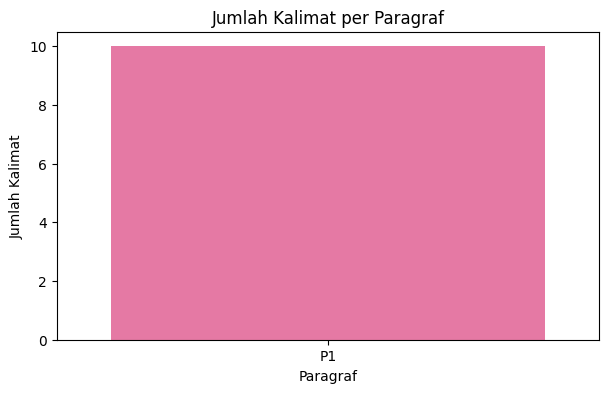

In [67]:
from nltk.tokenize import sent_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

text = """
This study aimed to examine in a longitudinal cohort design whether social media use among adolescents is related to symptoms of social anxiety, depressed mood, and physical symptoms of anxiety over time. As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed. Of the 3914 eligible adolescents, 2378 gave informed consent. Complete responses for this study were collected from 2211 students at the first wave, with 2052 responding roughly 12 months later, and 2097 responding in year 3. Linear mixed-effects models were used to analyze time spent on social media in relation to psychological distress over time. More time spent on social media was weakly but significantly associated with increased symptoms of depressed mood, social anxiety and symptoms of physical anxiety over time. However, the effect size of these relationships suggest they may not be of clinical relevance. The relationship between time spent on social media and symptoms of depressed mood and physical symptoms of anxiety grew stronger over time, although it is not known if this relationship is causal. The relationship between time spent on social media and all outcomes of psychological distress were stronger for girls than boys and increased social media use had a positive relationship with symptoms of depressed mood over time. The relationships found in this study were relatively small and future studies need to focus on the clinical and public health significance of these effects.
"""

# Pisahkan paragraf berdasarkan newline ganda
paragraf = [p.strip() for p in text.strip().split("\n\n") if p.strip()]

# Hitung jumlah kalimat per paragraf
jumlah_kalimat = [len(sent_tokenize(p)) for p in paragraf]

# Tampilkan hasil
for i, j in enumerate(jumlah_kalimat, start=1):
    print(f"Paragraf {i}: {j} kalimat")

# Visualisasi
plt.figure(figsize=(7,4))
sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],
            y=jumlah_kalimat, palette="RdPu")
plt.title("Jumlah Kalimat per Paragraf")
plt.xlabel("Paragraf")
plt.ylabel("Jumlah Kalimat")
plt.show()


Kode di atas bertujuan untuk menganalisis struktur teks pada bagian Abstract dengan menghitung jumlah kalimat dalam setiap paragraf. Paragradf dipisahkan berdasarkan jeda garis ganda (\n\n). Selanjutnya, setiap paragraf diproses menggunakan fungsi sent_tokenize dari NLTK untuk menghitung jumlah kalimat di dalamnya.

Hasil histogram di atas menunjukkan bahwa abstract terdiri dari satu paragraf yang terdiri dari 10 kalimat. Grafik ini menunjukkan bahwa meskipun hanya terdiri dari satu paragraf, bagian abstract ini berisi cukup banyak kalimat. Hal ini menunjukkan bahwa abstract tersebut memiliki informasi yang padat dan mencakup berbagai aspek penting dari penelitian secara singkat dan lengkap.

### **Introduction**

Paragraf 1: 4 kalimat
Paragraf 2: 5 kalimat
Paragraf 3: 7 kalimat
Paragraf 4: 3 kalimat
Paragraf 5: 5 kalimat
Paragraf 6: 8 kalimat
Paragraf 7: 1 kalimat


/tmp/ipython-input-1986125764.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],


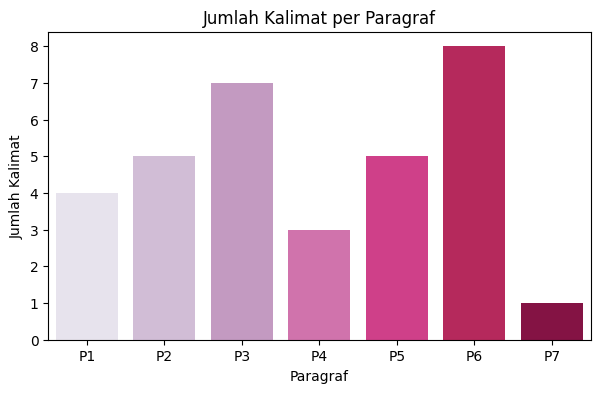

In [5]:
from nltk.tokenize import sent_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan teks (boleh dari abstract, introduction, dst)
text = """
The simultaneous increase in social media use and worsening self reported mental health among adolescents has motivated researchers to investigate the relationship between social media use and adolescent mental health (Heffer et al 2019; Jensen et al 2019; Keles et al 2019; McCrae et al 2017; Orben and Przybylski 2019; Riehm et al 2019; Seabrook et al 2016; Twenge et al 2018). As with in-person social interactions, social media experiences can be positive, negative, neutral, or mixed. Positive aspects include connecting with friends, increased social support, and greater levels of self-expression (Anderson and Jiang 2018; Seabrook et al 2016; Thorisdottir et al 2019). However, possible negative aspects of social media may include upward social comparisons, cyberbullying, fewer in-person interactions (Anderson and Jiang 2018; Thorisdottir et al 2019), less family time, and more conflicts with parents (Williams and Merten 2011).

Social media plays a role in adolescent social life and explaining how social media use can possibly influence something as complex as mental health requires a holistic theoretical framework. The transformation framework (Nesi et al 2018a, 2018b) proposes that the unique context of social media fundamentally transforms adolescents' peer experiences across multiple domains. For example, through what is referred to as asynchronicity or the
time that passes between responses in a dialogue online, adolescents can carefully select their words and engage in many conversations at the same time, as well as decide how to present themselves. Furthermore, this ongoing dialogue may contribute to feelings of pressure to be constantly online (Calancie et al 2017). Peer experiences are prospectively associated with mental health symptoms (Landstedt and Almquist 2019; Modin et al 2011); thus, understanding whether social media plays a role in adolescent mental health is important.

Some studies have concluded that social media use contributes to lower psychological wellbeing and increases symptoms of depression, anxiety, and psychological distress among children and adolescents (Keles et al 2019; McCrae et al 2017), although the associations are weak. Others maintain that there is little or no relationship between youth social media use and symptoms of depression (Heffer et al 2019) and psychological distress (Jensen
et al 2019). Several systematic reviews and meta-analysis on the topic have observed contradictory evidence of mixed, null, and positive associations. However, the nature of the relationship between social media use and psychological distress is not clear. This could be due to the high reliance on cross-sectional studies and lack of mediating and moderating variables (Huang 2017; Keles et al 2019; McCrae et al 2017; Seabrook et al 2016).
Another potential explanation for the disparate findings is that the concept itself is broad, often vague, and measured differently. Some studies use well-being scales (Booker et al 2018; Orben et al 2019), while others use general distress scales (Jensen et al 2019) or examine symptoms of  internalizing problems (Riehm et al 2019), such as anxiety and depression (Boers et al 2019; Coyne et al 2020; Heffer et al 2019; Vannucci and McCauley Ohannessian 2019).

The few longitudinal studies on the topic have reported mixed findings. Some find that social media use predicts higher depressive symptoms (Boers et al 2019; Vannucci and McCauley Ohannessian 2019), panic disorder symptoms (Vannucci and McCauley Ohannessian 2019), greater internalizing problems (Boers et al 2019; Riehm et al 2019) and worse well-being (Booker et al 2018). However, others have found that frequency of social media use does not predict later mental health outcomes (Coyne et al 2020; Jensen et al 2019).

The role of gender in social media and mental health relationship has also been inconclusive (McCrae et al 2017). Where there are gender differences, the relationship between social media and worse mental health has either been stronger for girls than boys (Frison and Eggermont 2016; Thorisdottir et al 2019) or only exist for girls (Devine and Lloyd 2012). A study on the relationship between social media and life satisfaction measured within six domains (ie, friends, family, appearance, life, school work, and school) found that gender was important; within-person models were significant for two out of six domains for boys and five out of six domains for girls (Orben and Przybylski 2019). However, two longitudinal studies found no gender differences in social media use and internalizing symptoms (Riehm et al 2019; Vannucci and McCauley Ohannessian 2019). Given these inconsistent findings, some have called for analyses to be stratified by gender or tested for gender interactions (Booker et al 2018).

This study sought to examine, over a three-year period, the relationships between time spent on social media and symptoms of depressed mood, social anxiety, and physical symptoms of anxiety among Icelandic adolescents. While other studies have typically focused on more general concepts, such as well-being (Booker et al 2018; Orben et al 2019) and overall distress (Jensen et al 2019; Riehm et al 2019), we specifically examined symptoms of
depressed mood, differentiating physical and social symptoms of anxiety (Coyne et al 2020; Vannucci and McCauley Ohannessian 2019). Our study addresses several shortcomings of previous work. First, because social media is rapidly evolving in the way it alters how adolescents interact with their peers, the recency of our data affords an advantage over older data by providing a current analysis of the relationship between use and mental health over time. Second, given the high prevalence of anxiety among girls in Western economies (Boret al 2014), we examined whether gender plays a role in the relationship between social media use and mental health over time. Third, there is a lack of empirical evidence on the effects of social media use on adolescents since the majority of studies have focused on young children or adults (Odgers and Jensen 2020). Finally, because of the compelling evidence showing the deleterious impact of divorce and family disruptions on children and adolescents (Amato 2000; Behere et al 2017), we controlled for parental support and family structure (Hall-Lande et al 2007; Stadler et al 2010). The reason being that adolescent social media use has been associated with less family time and more conflicts with parent (Williams and Merten 2011), as well as children from single-parent households having more screen time daily (Wartella et al 2013).

We hypothesized that: 1) there is a positive relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety; 2) the relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety increases over time; and 3) the observed relationships between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety will be stronger for girls than
boys.
"""

# Pisahkan paragraf berdasarkan newline ganda
paragraf = [p.strip() for p in text.strip().split("\n\n") if p.strip()]

# Hitung jumlah kalimat per paragraf
jumlah_kalimat = [len(sent_tokenize(p)) for p in paragraf]

# Tampilkan hasil
for i, j in enumerate(jumlah_kalimat, start=1):
    print(f"Paragraf {i}: {j} kalimat")

# Visualisasi
plt.figure(figsize=(7,4))
sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],
            y=jumlah_kalimat, palette="PuRd")
plt.title("Jumlah Kalimat per Paragraf")
plt.xlabel("Paragraf")
plt.ylabel("Jumlah Kalimat")
plt.show()


Sama dengan penjelasan kode pada abstract, introduction juga menggunakan sent_tokenize untuk menghitung jumlah kalimat. Hasil yang diperoleh menunjukkan bahwa panjang paragraf dalam teks introduction tidak merata. Paragraf ke-6 memiliki jumlah kalimat terbanyak, yaitu delapan kalimat yang menunjukkan bahwa bagian ini kemungkinan berisi penjelasan yang lebih padat atau argumen yang panjang. Sebaliknya, paragraf ke-7 hanya terdiri dari satu kalimat yang kemungkinan berfungsi sebagai penutup atau pernyataan ringkas.

### **Conclusion**

Paragraf 1: 4 kalimat


/tmp/ipython-input-738577412.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],


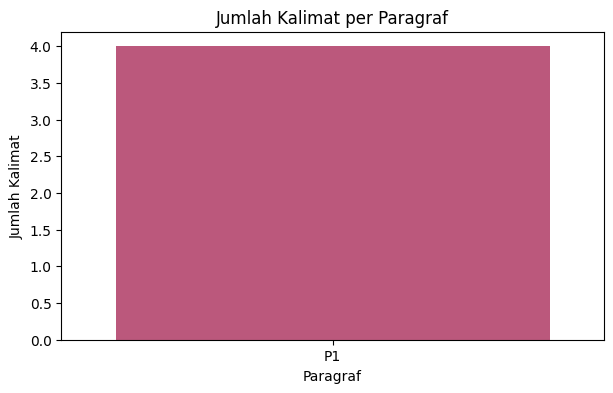

In [57]:
from nltk.tokenize import sent_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

text = """
In conclusion, although adolescent use of social media appears to confer some benefits (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019), it is also a relatively new and prevalent factor in the lives of adolescents that our data show is positively related to increased levels of psychological distress, although the effects were weak to small. However, the effect of social media on psychological distress is most likely multifactorial and a better understanding of the mechanisms involved is required before we can warrant major concerns about the longitudinal impact of social media on adolescent mental health.

"""

# Digunakan untuk memisahkan paragraf berdasarkan newline ganda
paragraf = [p.strip() for p in text.strip().split("\n\n") if p.strip()]

# menghitung jumlah kalimat per paragraf
jumlah_kalimat = [len(sent_tokenize(p)) for p in paragraf]

for i, j in enumerate(jumlah_kalimat, start=1):
    print(f"Paragraf {i}: {j} kalimat")

# Visualisasi
plt.figure(figsize=(7,4))
sns.barplot(x=[f"P{i+1}" for i in range(len(jumlah_kalimat))],
            y=jumlah_kalimat, palette="plasma")
plt.title("Jumlah Kalimat per Paragraf")
plt.xlabel("Paragraf")
plt.ylabel("Jumlah Kalimat")
plt.show()


berdasarakn hasil yang diperoleh menunjukkan bahwa panjang paragraf dalam conclusion memiliki 4 kalimat. Hal ini wajar karena conclusion merupakan penutup dalam sebuah paper.

### **Analisis Tambahan**

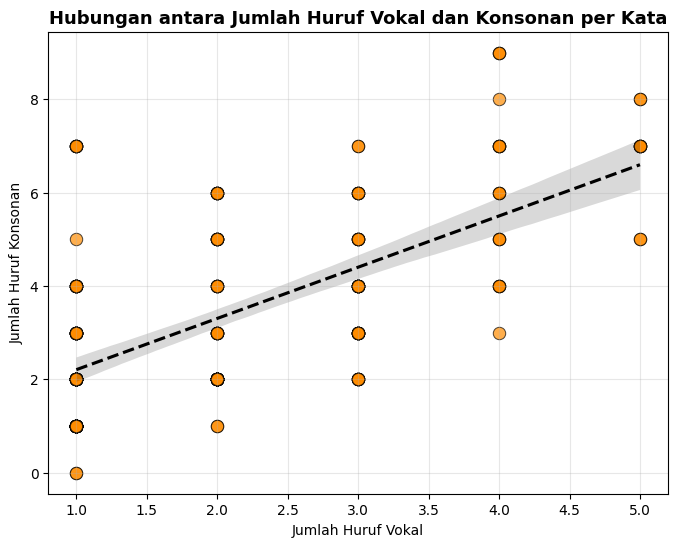

Korelasi antara jumlah vokal dan konsonan: 0.62


In [6]:
# Scatter plot hubungan antara jumlah vokal dan konsonan
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='vokal', y='konsonan', color='darkorange', s=80, alpha=0.7, edgecolor='black')

# Tambahan garis regresi untuk lihat pola hubungan
sns.regplot(data=df, x='vokal', y='konsonan', scatter=False, color='black', line_kws={'linestyle':'--'})

plt.title('Hubungan antara Jumlah Huruf Vokal dan Konsonan per Kata', fontsize=13, fontweight='bold')
plt.xlabel('Jumlah Huruf Vokal')
plt.ylabel('Jumlah Huruf Konsonan')
plt.grid(alpha=0.3)
plt.show()

# Hitung korelasi sederhana
corr = df['vokal'].corr(df['konsonan'])
print(f"Korelasi antara jumlah vokal dan konsonan: {corr:.2f}")


Scatter plot di atas menunjukkan hubungan antara jumlah huruf vokal dan konsonan dalam setiap kata pada teks. Pola dari titik-titik tersebut menunjukkan bahwa semakin banyak huruf vokal dalam sebuah kata, maka jumlah huruf konsonannya juga semakin banyak. Hal ini terlihat dari arah garis regresi yang miring ke arah kanan atas. Nilai korelasi sebesar 0,62 menunjukkan adanya hubungan positif yang cukup kuat antara kedua variabel tersebut.

Dengan kata lain, kata-kata yang memiliki banyak vokal biasanya juga memiliki banyak konsonan yang menunjukkan bahwa teks ini cenderung terdiri dari kata-kata yang panjang dan memiliki struktur suku kata yang kompleks.
Pola ini umum ditemukan dalam tulisan ilmiah atau teks akademik, di mana banyak digunakan istilah teknis atau konseptual yang memiliki variasi huruf yang lebih luas. Secara keseluruhan, hasil ini menunjukkan bahwa teks ini bersifat formal dan informatif dengan tingkat kesulitan kata yang relatif tinggi.

### **Word Cloud**

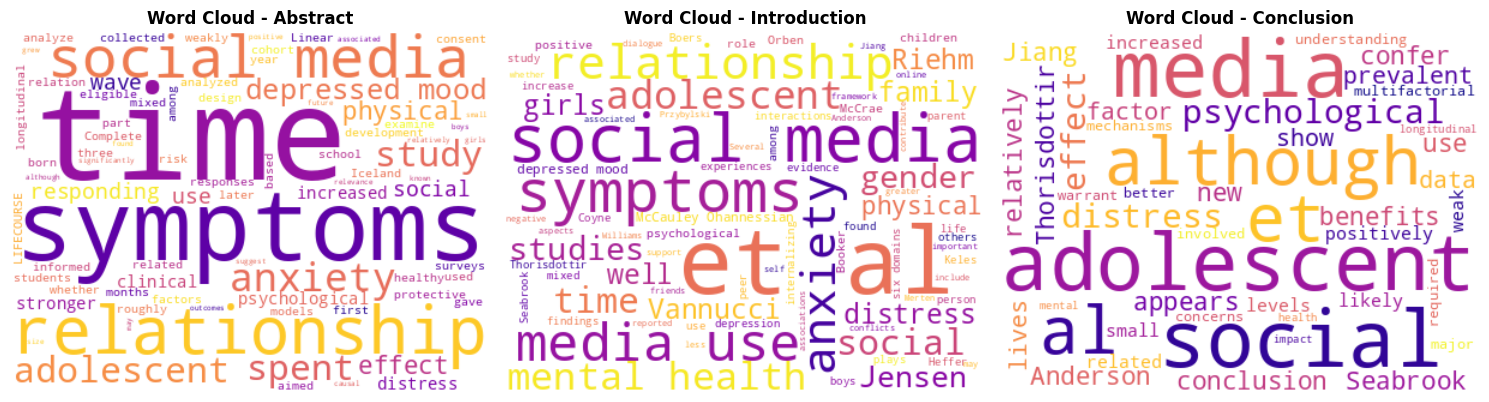

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_parts = {
    "Abstract": """This study aimed to examine in a longitudinal cohort design whether social media use among adolescents is related to symptoms of social anxiety, depressed mood, and physical symptoms of anxiety over time. As part of the LIFECOURSE study of risk and protective factors for healthy adolescent development, three waves of school-based surveys of adolescents born in Iceland in 2004 were analyzed. Of the 3914 eligible adolescents, 2378 gave informed consent. Complete responses for this study were collected from 2211 students at the first wave, with 2052 responding roughly 12 months later, and 2097 responding in year 3. Linear mixed-effects models were used to analyze time spent on social media in relation to psychological distress over time. More time spent on social media was weakly but significantly associated with increased symptoms of depressed mood, social anxiety and symptoms of physical anxiety over time. However, the effect size of these relationships suggest they may not be of clinical relevance. The relationship between time spent on social media and symptoms of depressed mood and physical symptoms of anxiety grew stronger over time, although it is not known if this relationship is causal. The relationship between time spent on social media and all outcomes of psychological distress were stronger for girls than boys and increased social media use had a positive relationship with symptoms of depressed mood over time. The relationships found in this study were relatively small and future studies need to focus on the clinical and public health significance of these effects.""",
    "Introduction": """The simultaneous increase in social media use and worsening self-reported mental health among adolescents has motivated researchers to investigate the relationship between social media use and adolescent mental health (Heffer et al. 2019; Jensen et al. 2019; Keles et al. 2019; McCrae et al. 2017; Orben and Przybylski 2019; Riehm et al. 2019; Seabrook et al. 2016; Twenge et al. 2018). As with in-person social interactions, social media experiences can be positive, negative, neutral, or mixed. Positive aspects include connecting with friends, increased social support, and greater levels of self-expression (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019). However, possible negative aspects of social media may include upward social comparisons, cyberbullying, fewer in-person interactions (Anderson and Jiang 2018; Thorisdottir et al. 2019), less family time, and more conflicts with parents (Williams and Merten 2011).

Social media plays a role in adolescent social life and explaining how social media use can possibly influence something as complex as mental health requires a holistic theoretical framework. The transformation framework (Nesi et al. 2018a, 2018b) proposes that the unique context of social media fundamentally transforms adolescents' peer experiences across multiple domains. For example, through what is referred to as asynchronicity or the
time that passes between responses in a dialogue online, adolescents can carefully select their words and engage in many conversations at the same time, as well as decide how to present themselves. Furthermore, this ongoing dialogue may contribute to feelings of pressure to be constantly online (Calancie et al. 2017). Peer experiences are prospectively associated with mental health symptoms (Landstedt and Almquist 2019; Modin et al. 2011); thus, understanding whether social media plays a role in adolescent mental health is important.

Some studies have concluded that social media use contributes to lower psychological wellbeing and increases symptoms of depression, anxiety, and psychological distress among children and adolescents (Keles et al. 2019; McCrae et al. 2017), although the associations are weak. Others maintain that there is little or no relationship between youth social media use and symptoms of depression (Heffer et al. 2019) and psychological distress (Jensen
et al. 2019). Several systematic reviews and meta-analysis on the topic have observed contradictory evidence of mixed, null, and positive associations. However, the nature of the relationship between social media use and psychological distress is not clear. This could be due to the high reliance on cross-sectional studies and lack of mediating and moderating variables (Huang 2017; Keles et al. 2019; McCrae et al. 2017; Seabrook et al. 2016).
Another potential explanation for the disparate findings is that the concept itself is broad, often vague, and measured differently. Some studies use well-being scales (Booker et al. 2018; Orben et al. 2019), while others use general distress scales (Jensen et al. 2019) or examine symptoms of  internalizing problems (Riehm et al. 2019), such as anxiety and depression (Boers et al. 2019; Coyne et al. 2020; Heffer et al. 2019; Vannucci and McCauley Ohannessian 2019).

The few longitudinal studies on the topic have reported mixed findings. Some find that social media use predicts higher depressive symptoms (Boers et al. 2019; Vannucci and McCauley Ohannessian 2019), panic disorder symptoms (Vannucci and McCauley Ohannessian 2019), greater internalizing problems (Boers et al. 2019; Riehm et al. 2019) and worse well-being (Booker et al. 2018). However, others have found that frequency of social media use does not predict later mental health outcomes (Coyne et al. 2020; Jensen et al. 2019).

The role of gender in social media and mental health relationship has also been inconclusive (McCrae et al. 2017). Where there are gender differences, the relationship between social media and worse mental health has either been stronger for girls than boys (Frison and Eggermont 2016; Thorisdottir et al. 2019) or only exist for girls (Devine and Lloyd 2012). A study on the relationship between social media and life satisfaction measured within six domains (i.e., friends, family, appearance, life, school work, and school) found that gender was important; within-person models were significant for two out of six domains for boys and five out of six domains for girls (Orben and Przybylski 2019). However, two longitudinal studies found no gender differences in social media use and internalizing symptoms (Riehm et al. 2019; Vannucci and McCauley Ohannessian 2019). Given these inconsistent findings, some have called for analyses to be stratified by gender or tested for gender interactions (Booker et al. 2018).

This study sought to examine, over a three-year period, the relationships between time spent on social media and symptoms of depressed mood, social anxiety, and physical symptoms of anxiety among Icelandic adolescents. While other studies have typically focused on more general concepts, such as well-being (Booker et al. 2018; Orben et al. 2019) and overall distress (Jensen et al. 2019; Riehm et al. 2019), we specifically examined symptoms of
depressed mood, differentiating physical and social symptoms of anxiety (Coyne et al. 2020; Vannucci and McCauley Ohannessian 2019). Our study addresses several shortcomings of previous work. First, because social media is rapidly evolving in the way it alters how adolescents interact with their peers, the recency of our data affords an advantage over older data by providing a current analysis of the relationship between use and mental health over time. Second, given the high prevalence of anxiety among girls in Western economies (Boret al. 2014), we examined whether gender plays a role in the relationship between social media use and mental health over time. Third, there is a lack of empirical evidence on the effects of social media use on adolescents since the majority of studies have focused on young children or adults (Odgers and Jensen 2020). Finally, because of the compelling evidence showing the deleterious impact of divorce and family disruptions on children and adolescents (Amato 2000; Behere et al. 2017), we controlled for parental support and family structure (Hall-Lande et al. 2007; Stadler et al. 2010). The reason being that adolescent social media use has been associated with less family time and more conflicts with parent (Williams and Merten 2011), as well as children from single-parent households having more screen time daily (Wartella et al. 2013).

We hypothesized that: 1) there is a positive relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety; 2) the relationship between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety increases over time; and 3) the observed relationships between social media use and symptoms of depressed mood, symptoms of social anxiety and physical symptoms of anxiety will be stronger for girls than
boys.""" ,
    "Conclusion": """In conclusion, although adolescent use of social media appears to confer some benefits (Anderson and Jiang 2018; Seabrook et al. 2016; Thorisdottir et al. 2019), it is also a relatively new and prevalent factor in the lives of adolescents that our data show is positively related to increased levels of psychological distress, although the effects were weak to small. However, the effect of social media on psychological distress is most likely multifactorial and a better understanding of the mechanisms involved is required before we can warrant major concerns about the longitudinal impact of social media on adolescent mental health."""

}


fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, (bagian, teks) in zip(axes, data_parts.items()):
    wc = WordCloud(
        width=400,
        height=300,
        background_color="white",
        colormap="plasma",
        max_words=80,
        contour_color="steelblue",
        contour_width=2
    ).generate(teks)

    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(f"Word Cloud - {bagian}", fontsize=12, fontweight="bold")
    ax.axis("off")

plt.tight_layout()
plt.show()


Kode di atas digunakan untuk mencari word cloud atau kata yang sering muncul dalam setiap kaimat. Ketiga word cloud menunjukkan bahwa topik utama tulisan ini sangat konsisten berfokus pada hubungan antara penggunaan media sosial dengan gejala kesehatan mental pada remaja. Pada bagian Abstract, kata-kata seperti “time”, “symptoms”, “relationship”, “social media”, dan “anxiety” mendominasi, yang menunjukkan bahwa ringkasan penelitian banyak menyoroti durasi penggunaan media sosial serta kaitannya dengan gejala psikologis seperti kecemasan dan depresi.

Masuk ke bagian Introduction, pola yang muncul semakin memperkuat konteks penelitian. Kata “et al” sering muncul karena bagian pendahuluan biasanya mengutip banyak penelitian sebelumnya. Kata-kata seperti “mental health”, “gender”, dan “studies” menunjukkan bahwa penulis membahas berbagai temuan terdahulu serta faktor-faktor pembeda seperti jenis kelamin.

Pada bagian Conclusion, fokus bergeser sedikit dari deskripsi ke arah penegasan kesimpulan. Kata seperti “although”, “benefits”, “likely”, dan “weak” memberi indikasi bahwa kesimpulan penelitian bersifat nuanced, yaitu tidak sepenuhnya menyatakan hubungan positif atau negatif secara mutlak. Penulis tampaknya menekankan bahwa meskipun ada indikasi dampak negatif media sosial terhadap distress psikologis, hubungan tersebut mungkin dipengaruhi oleh banyak faktor lain.